# Util code snippets
This notebook contains only isolated code snippets to do certain data manipulations and experiments that do not necessarily contribute to the main idea. This is only for reference on how secondary aspects might be achieved.

## Going from RGB to Black or White contour images

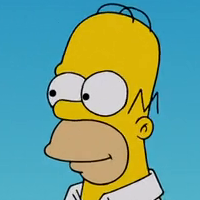

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from matplotlib import image as mpl_image

width, height = 200, 200
# width, height = 64, 64
original = Image.open('images/homer.png')
original.thumbnail((width, height))
original

### Grayscale

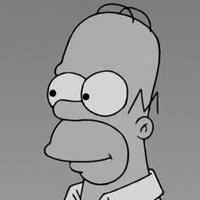

In [6]:
gray = original.convert('L')
gray

### Black & White - PIL point style

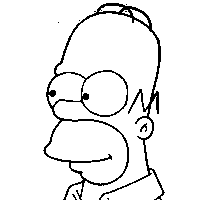

In [26]:
pil_bw = gray.point(lambda x: 0 if x<120 else 255, '1')
pil_bw

### Black & White - Pylab contour style

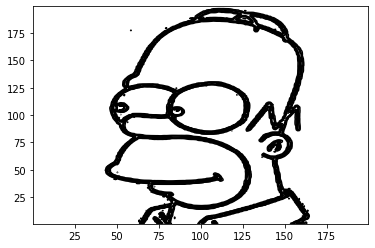

In [27]:
from pylab import contour

pylab_bw = contour(gray, colors='black', origin='image')
pylab_bw

### Black & White - OpenCV style

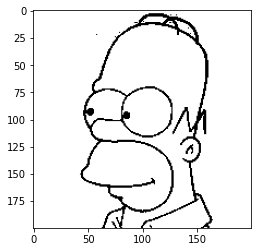

In [28]:
import cv2

original_cv2 = cv2.imread('images/homer.png')
# Grayscale
gray = cv2.cvtColor(original_cv2, cv2.COLOR_BGR2GRAY)
  
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap='gray')
plt.show()

In [29]:
pil_bw.save('images/homer_bw_pil.png')

### Create a corrupted image with gaussian noise

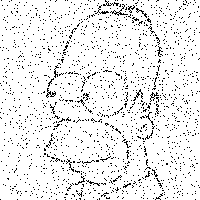

In [30]:
bw = np.array(pil_bw)
sigma = 0.6
width, height = bw.shape
bw_corrupted = bw + sigma * np.random.randn(width, height)
bw_corrupted[bw_corrupted > 0] = 255
bw_corrupted[bw_corrupted < 0] = 0
out = Image.fromarray(bw_corrupted).convert('L')
out.save('images/homer_bw_noise.png')
out

### Create a corrupted image with a mask

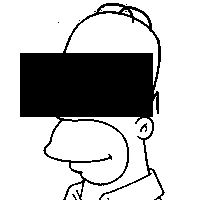

In [52]:
bw = np.array(pil_bw)
sigma = 0.6
width, height = bw.shape
bw_corrupted = bw.copy()
bw_corrupted[np.random.randint(0, height / 2):np.random.randint(width/2, height),
    np.random.randint(0, height/2):np.random.randint(width/2, height)] = 0
# bw_corrupted[width//2 + 10:width, 0: height] = 0
out = Image.fromarray(bw_corrupted).convert('L')
out.save('images/homer_bw_rand_mask.png')
out

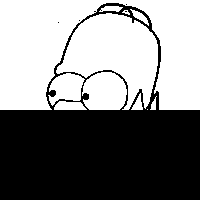

In [53]:
bw_corrupted = bw.copy()
bw_corrupted[width//2 + 10:width, 0: height] = 0
out = Image.fromarray(bw_corrupted).convert('L')
out.save('images/homer_bw_fixed_mask.png')
out

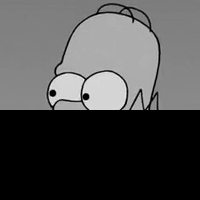

In [8]:
gray_corrupted = gray.copy()
gray_corrupted = np.array(gray_corrupted)
gray_corrupted[width//2 + 10:width, 0: height] = 0
out = Image.fromarray(gray_corrupted).convert('L')
out.save('images/homer_gray_fixed_mask.png')
out

## Generate bw dataset

In [1]:
!mkdir -p subset_bw

In [5]:
from PIL import Image
import os

originals = os.listdir('subset/')
originals = [(img, os.path.join('subset', img)) for img in originals]
for file, path in originals:
    bw = Image.open(path).convert('L').point(lambda x: 0 if x<100 else 255, '1')
    bw.save(f'subset_bw/{file}')

## Generate bw noisy dataset

In [6]:
!mkdir -p subset_bw_noise

In [8]:
from PIL import Image
import numpy as np
import os

originals = os.listdir('subset/')
originals = [(img, os.path.join('subset', img)) for img in originals]
for file, path in originals:
    bw = Image.open(path).convert('L').point(lambda x: 0 if x<100 else 255, '1')
    bw = np.array(bw)
    sigma = 0.6
    width, height = bw.shape
    bw_corrupted = bw + sigma * np.random.randn(width, height)
    bw_corrupted[bw_corrupted > 0] = 255
    bw_corrupted[bw_corrupted < 0] = 0
    out = Image.fromarray(bw_corrupted).convert('L')
    out.save(f'subset_bw_noise/{file}')

## Generate bw masked dataset

In [9]:
!mkdir -p subset_bw_masked

In [11]:
from PIL import Image
import numpy as np
import os

originals = os.listdir('subset/')
originals = [(img, os.path.join('subset', img)) for img in originals]
for file, path in originals:
    bw = Image.open(path).convert('L').point(lambda x: 0 if x<100 else 255, '1')
    bw = np.array(bw)
    sigma = 0.6
    width, height = bw.shape
    bw_corrupted = bw.copy()
    bw_corrupted[np.random.randint(0, height / 2):np.random.randint(width/2, height),
        np.random.randint(0, height/2):np.random.randint(width/2, height)] = 0
    out = Image.fromarray(bw_corrupted).convert('L')
    out.save(f'subset_bw_masked/{file}')
    out

## Generate gray scale dataset

In [1]:
!mkdir -p subset_gray

In [2]:
from PIL import Image
import numpy as np
import os

originals = os.listdir('subset/')
originals = [(img, os.path.join('subset', img)) for img in originals]
for file, path in originals:
    gray = Image.open(path).convert('L')
    gray.save(f'subset_gray/{file}')

## Generate gray scale masked

In [3]:
!mkdir -p subset_gray_masked

In [4]:
from PIL import Image
import numpy as np
import os

originals = os.listdir('subset/')
originals = [(img, os.path.join('subset', img)) for img in originals]
for file, path in originals:
    gray = Image.open(path).convert('L')
    gray = np.array(gray)
    sigma = 0.6
    width, height = gray.shape
    gray_corrupted = gray.copy()
    gray_corrupted[np.random.randint(0, height / 2):np.random.randint(width/2, height),
        np.random.randint(0, height/2):np.random.randint(width/2, height)] = 0
    out = Image.fromarray(gray_corrupted).convert('L')
    out.save(f'subset_gray_masked/{file}')